# TKT4108 Structural dynamics 2

## Solution exercise 2

**Main topics:** Introduction to random vibrations and repetition of fundamental structural dynamics

**References:** Newland Chapter 1-3

### Problem 1: Dynamic response of a shear frame

In this problem, we will revisit some topics from TKT 4201 Structural Dynamics 1.
The simple frame's vertical members displayed below have negligible mass and transverse stiffness $k$. The horizontal members can be modelled as rigid and with mass $m$. The frame is subjected to two random loads $X_1$ and $X_2$.


<img src="shearframe.svg">




**a)**

The mass matrix is diagonal since the masses are directly attached to the degrees of freedom (lumped mass).

$$ \mathbf{M} = m\left[ {\begin{array}{*{20}{c}} 1 & 0\\ 0 & 1 \end{array}} \right]  $$

The stiffness matrix can be obtain by setting $y_1=1$ and $y_2=0$ to obtain the first column in the stiffness matrix and then setting $y_1=1$ and $y_2=0$ to obtain the second column:

<img src="shearframe_equilibrium2.svg">

The stiffness coefficients are obtained by taking the sum of forces for each floor.

$$ \mathbf{K} = k\left[ {\begin{array}{*{20}{c}} 4 & -2\\ -2 & 2 \end{array}} \right]  $$

Equation of motion:

$$ \mathbf{M} \ddot{\mathbf{y}}(t)
+
\mathbf{K} \mathbf{y}(t)
=
\mathbf{X}(t)  $$


$$ \mathbf{y}(t) = \left[ \begin{array}{c} y_1(t) \\ y_2(t) \end{array}   \right] $$ 


$$ \mathbf{X}(t) = \left[ \begin{array}{c} X_1(t) \\ X_2(t) \end{array}   \right] $$ 







**b)**

We solve the characteristic equation.

$$ 
\text{det}( 
\mathbf{K}-\lambda \mathbf{M}
)=
\mathbf{0}
$$

$$
\text{det} \big(
\begin{bmatrix}
4 & -2 \\
-2 & 2
\end{bmatrix}
-\lambda \frac{m}{k}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} \big)
=0, 
\quad \lambda=\omega^2
$$

$$
\omega_1=0.874 \sqrt{\frac{k}{m}}
,\quad
\omega_2=2.29 \sqrt{\frac{k}{m}}
$$


$$
( 
\mathbf{K}-\omega_1^2 \mathbf{M}
) \mathbf{v}_1
=\mathbf{0}
\implies
\mathbf{v}_1
=
\begin{bmatrix}
1.0 \\
1.618
\end{bmatrix}
$$


$$
( 
\mathbf{K}-\omega_2^2 \mathbf{M}
) \mathbf{v}_2
=\mathbf{0}
\implies
\mathbf{v}_2
=
\begin{bmatrix}
1.0 \\
-0.618
\end{bmatrix}
$$


<img src="shearframe_modes.svg">

**c)**


$$ \mathbf{M}^* = \mathbf{v}^\text{T} \mathbf{M} \mathbf{v}    $$

$$ \mathbf{K}^* = \mathbf{v}^\text{T} \mathbf{K} \mathbf{v}    $$


$$ \mathbf{K}_{11}^* = k(4\cdot 1-2 \cdot 1.618) \cdot 1  + k(-2 \cdot 1+1.618 \cdot 2) \cdot 1.618 = 2.764k $$

$$ \mathbf{K}_{22}^* = k(4\cdot 1-2 \cdot -0.618) \cdot 1  + k(-2 \cdot 1+0.618 \cdot 2) \cdot 0.618 = 7.236k $$


$$ \mathbf{M}_{11}^* = m \cdot 1 \cdot 1  + m \cdot 1.618 \cdot 1.618 = 3.618m $$

$$ \mathbf{M}_{22}^* = m \cdot 1 \cdot 1  + m \cdot -0.618 \cdot -0.618 = 1.384m $$


$$ X^{*}_{1} = X_1 + 1.618X_2  $$

$$ X^{*}_{2} = X_1 -0.618 X_2  $$


$$ \left[ \begin{array}{c} 3.618m & 0 \\ 0 &  1.384m   \end{array}  \right]  \left[ \begin{array}{c} \ddot{z}_1(t) \\ \ddot{z}_2(t) \end{array}   \right] 
+  \left[ \begin{array}{c} 2.764k & 0 \\ 0 &  7.236k    \end{array}  \right]  \left[ \begin{array}{c} z_1(t) \\ z_2(t) \end{array}   \right] 
= \left[ \begin{array}{c}  X_1 + 1.618X_2 \\ X_1 -0.618 X_2 \end{array}   \right] $$

**d)**


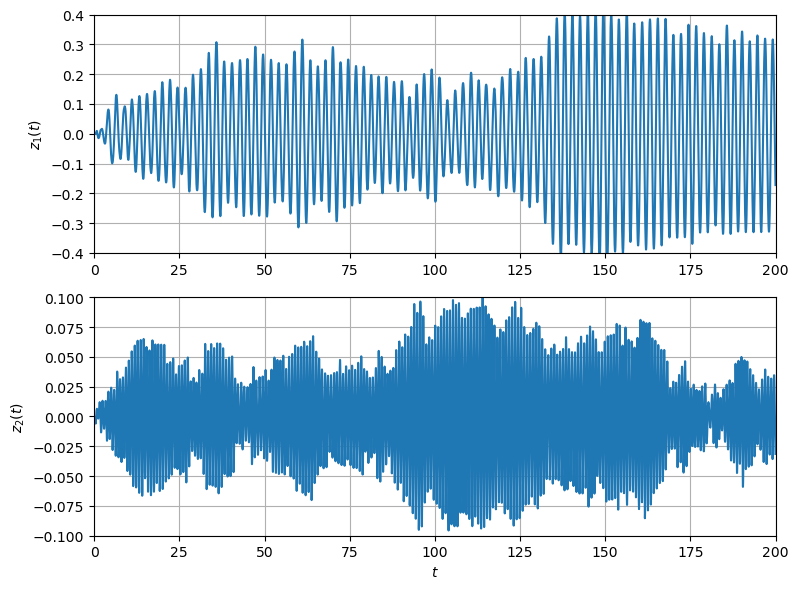

In [30]:
# Import the packages we need
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import sys
sys.path.append(r'../../modules')
from time_integration import * # Import all functions in the module time_integration

# Define stiffness amd mass matrix in nodal basis 
k = 10000
m = 1000
K = np.array([[4, -2],[-2, 2]])*k
M = np.array([[1, 0],[0, 1]])*m

# Solve generalized eigenvalue problem
lam,v = spla.eig(K,M)

# Sort eigenvalues and eigenvectors (lowest frequency first)
pos = np.argsort(lam)
lam = lam[pos]
v = v[:,pos]

# Normalize eigenvalues making y_1=1
v[:,0] = v[:,0] / v[0,0] 
v[:,1] = v[:,1] / v[0,1] 

# Transform the stiffness and mass matrices to modal basis
K_modal = v.T @ K @ v
M_modal = v.T @ M @ v

# Define modal damping matrix
zeta_1 = 0.5/100
zeta_2 = 0.5/100
lam = np.real(lam)
C_modal = np.array([[2*M_modal[0,0]*lam[0]**0.5*zeta_1, 0] ,[0, 2*M_modal[1,1]*lam[1]**0.5*zeta_2]])

# Make time vector
T=200
dt = 1/50 # time step
t = np.arange(0,np.ceil(T/dt))*dt

# Generate the load
rho_X1_X2 = 0.5 # Load correlation coefficient
stdX1 = 1000.0 # Standard deviation X1
stdX2 = 1000.0 # Standard deviation X2

covmX = np.array(([[stdX1**2, rho_X1_X2*stdX1*stdX2], [rho_X1_X2*stdX1*stdX2, stdX2**2]])) # Covariance matrix of the loads
lam2,v2 = spla.eig(covmX) #Solve eigenvalue problem using scipy 
covmX_unc = np.matmul(np.matmul(v2.T,covmX),v2) # Transform covariance matrix to uncorrelated space

U = np.vstack((np.random.normal(0, covmX_unc[0,0]**0.5, t.shape[0]),np.random.normal(0, covmX_unc[1,1]**0.5, t.shape[0])))
X = np.matmul(v2,U) # Transform to correlated space

# Transform load to modal basis
X_modal = v.T @ X

u0 = np.zeros((2,1))
udot0 = np.zeros((2,1))

z, zdot, z2dot = linear_newmark_krenk(M_modal,C_modal,K_modal,X_modal,u0,udot0,dt)

fix, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(t,z[0,:])
axs[0].set_xlim(0,200)
axs[0].set_ylim(-0.4,0.4)
axs[0].grid(True)
axs[0].set_ylabel("$z_1(t)$")

axs[1].plot(t,z[1,:])
axs[1].set_xlim(0,200)
axs[1].set_ylim(-0.1,0.1)
axs[1].grid(True)
axs[1].set_ylabel("$z_2(t)$")
axs[1].set_xlabel("$t$")

plt.tight_layout()

**e)**

We can study the importance of the correlation of the two loads $X_1$ and $X_2$ by studying the variance of the modal loads $X^*_1$ and $X^*_2$.
Let us start with $X^*_1$:

$$ \sigma^2_{X^*_1} = E\left[ {X^*_{1}}^2 \right] = 
E\left[  \left(X_1 + 1.618X_2 \right)^2 \right] =  
E\left[  X_1^2 + 2 \cdot X_1 \cdot 1.618X_2 + (1.618X_2)^2 \right] =
E\left[  X_1^2 \right] + 3.236 E \left[ X_1 \cdot X_2 \right] + 2.618 E\left[X_2^2 \right]  $$

$$ \sigma^2_{X^*_1} = \sigma^2_{X_1} + 2.618\sigma^2_{X_2} + 3.236\rho_{X_1X_2} \sigma_{X_1} \sigma_{X_2} $$

Positive correlation ($\rho_{X_1 X_2}>0)$ between $X_1$ and $X_2$ gives increased modal load (and consequently a large response) for mode 1. 

This can also be explained from mode shape 1: the displacement of $y_1$ and $y_2$ are both in the same direction and so a positive load correlation will excite this mode more than if there was zero correlation. The opposite is true for mode 2, where a negative correlation leads to a larger modal load. This is also readily seen by repeating the calculations shown above for mode 2:

$$ \sigma^2_{X^*_2} = \sigma^2_{X_1} + 0.382\sigma^2_{X_2} -1.236\rho_{X_1 X_2} \sigma_{X_1} \sigma_{X_2} $$




### Problem 2: Technical terms

**a)**

Explain the following terms and how they are related using text and figures
- Probability density function.
- Cumulative distribution function.
- Mean value
- Mean square value
- Variance

#### Solution:
The **probability density function** of a variable $X$ specify the probability of the variable beeing in a particular interval. The probability density is always positive and the area under the curve is always one to fulfill the law of total probability
$$ P\left[ a \leq X \leq b  \right] = \int_{a}^{b} f_X(x) \: \text{d}x $$

The **cumulative distribution function** is the integral of the probability density function. The function is zero for $X=-\infty$ and one for $X=\infty$
$$F_X(x) = P\left[ X \leq x  \right] = \int_{-\infty}^{x}f_X(x) \: \text{d}x $$

The **mean value** is the centroid of the probability density function (first moment) or the average

$$ \mu_x = \int_{-\infty}^{\infty}xf_X(x) \: \text{d}x $$

$$ \mu_x = \frac{1}{T}\int_{0}^{T}x(t) \: \text{d}t $$

The **mean square value** is the second moment of the probability density function or the time average of the square of the stochastic process

$$ E\left[x^2 \right] = \int_{-\infty}^{\infty}x^2f_X(x) \: \text{d}x  $$

$$ E\left[x^2 \right] = \frac{1}{T}\int_{0}^{T}x^2(t) \: \text{d}t $$

The **variance** is the same as the mean square but with the mean value removed

$$ \sigma_x^2 = \int_{-\infty}^{\infty} \left( x-\mu_x \right)^2 f_X(x) \: \text{d}x $$

$$ \sigma_x^2 = \frac{1}{T}\int_{0}^{T} \left(x(t) -\mu_x \right)^2  \: \text{d}t $$

**b)**

The figure below shows the joint probability distribution of $x_1$ and $x_2$. The volume under the surface is equal to one. 

<img src="Conditional_probability.jpg">

We now consider that we know the outcome of $x_2$, which means that the probability (elementary volume) $p(x_1,x_2)\: \text{d}x_2 \: \text{d} x_2$ needs to be within the shaded volume. We also need to "update the reference volume" since the volume of the strip shall be the reference instead of the volume under the entire joint probability function. This can be expressed as follows. 

$$ p({x_1}|{x_2})d{x_1} = \frac{\text{Elementary volume}}{\text{Volume of shaded strip}} $$

Inserting the mathematical expressions provides

$$ p({x_1}|{x_2})d{x_1} = \frac{{p({x_1},{x_2}) \: \text{d} {x_1}d{x_2}}}{{ \: \text{d} {x_2}\int_{ - \infty }^\infty  {p({x_1},{x_2}) \: \text{d} {x_1}} }} $$

Which can be further simplified to

$$p({x_1}|{x_2}) = \frac{{p({x_1},{x_2})}}{{\int_{ - \infty }^\infty  {p({x_1},{x_2}) \: \text{d} {x_1}} }}$$

integrating $\int_{ - \infty }^\infty  {p({x_1},{x_2}) \: \text{d} {x_1}}$ results in $p({x_2})$ providing the following expression for conditional probability

$$p({x_1}|{x_2}) = \frac{{p({x_1},{x_2})}}{{p({x_2})}}$$

The variables $x_1$ and $x_2$ are independent if the joint probability distribution can be expressed as the product of the marginal distributions $p(x,y)=p(x) p(y)$. If the outcome for one random variable is known, it does not influence the conditional probability of the other variable, thus $p(x|y)=p(x)$.
  
**c)**

Let us consider the two variables $x_1$ and $x_2$
The auto-correlation functions of, for instance, the stochastic process $x_1$ is the expected value of the function at one time instant multiplied with itself at another time instant

$$R_{x_1}(t_1,t_2)= E \left[x_1(t_1)x_1(t_2)  \right] $$

If the stochastic process is stationary, the auto-correlation only depends on the time lag $\tau=t_2-t_1$. The auto correlation function can then be written as

$$R_{x_1}(\tau)= E \left[x_1(t)x_1(t+\tau)  \right] $$

The auto-correlation is, in most cases, a decaying function that is symmetric about the vertical axis

The cross-correlation function is very similar to the auto-correlation function, but it is the product of two different stochastic processes in this case. 

$$R_{x_1x_2}(\tau)= E \left[x_1(t)x_2(t+\tau)  \right] $$

The cross-correlation function is, in general, not symmetric about the vertical axis.


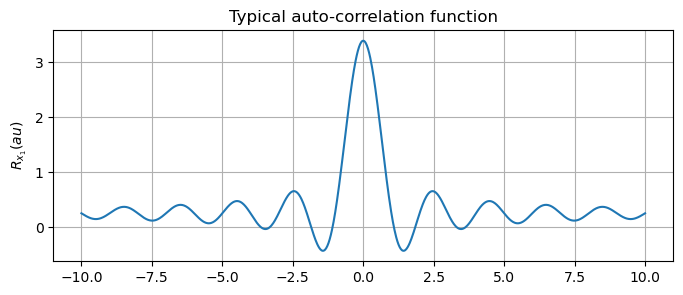

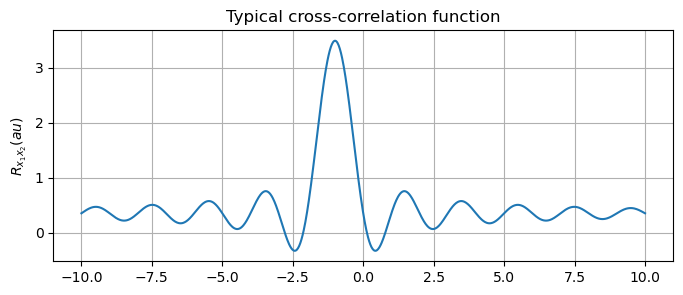

In [31]:
tau = np.linspace(-10,10,1000)
mean_x1 = 0.5
mean_x2 = 0.7
Rx1 = np.sin(np.pi*tau)/tau + mean_x1**2 

Rx1x2 = np.sin(np.pi*(tau+1))/(tau+1) + mean_x1*mean_x2

plt.figure(figsize=(8,3))
plt.plot(tau,Rx1)
plt.title("Typical auto-correlation function")
plt.ylabel("$R_{x_1}(\tau)$")
plt.grid()

plt.figure(figsize=(8,3))
plt.plot(tau,Rx1x2)
plt.title("Typical cross-correlation function")
plt.ylabel("$R_{x_1x_2}(\tau)$")
plt.grid()



### Problem 3: Rayleigh distribution

**a)**

Taking the derivative of the cumulative distribution to obtain the probability density function

$$ f_x(x) =  \frac{\text{d} F_x(x)}{\text{d} x}=  e^{-x^{2}/(2\sigma ^{2})} x/\sigma ^{2}$$

The area under the curve needs to be one to fulfill the total probability theorem.

Total probability = 0.999994


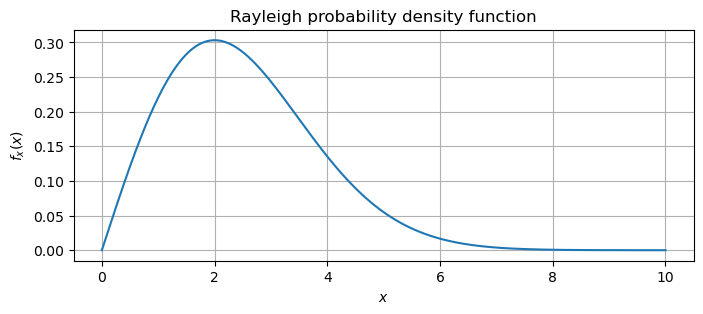

In [32]:
x = np.linspace(0,10,1000)

sigma = 2
fx = np.exp(-x**2/2/sigma/2)*x/sigma**2

plt.figure(figsize=(8,3))
plt.plot(x,fx)
plt.title("Rayleigh probability density function")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f_x(x)$")

print("Total probability = " + "{:.6f}".format(np.trapz(fx,x)))

**b)**

We do numerical integration by the trapezoidal rule.

In [33]:
mean_value = np.trapz(x*fx,x)

print("The mean value is " +  "{:.3f}".format(mean_value))

The mean value is 2.507
